# Assignment 2 - Data scaling and Supervised learning
### COMP 4300 | 6981 Data Preparation Techniques

**Name:** Abdullah Aqeel

**Student #:** 202043030

**Email:** aaqeel@mun.ca

### Assignment Description

The goal of this assignment is to get you familiar with the entire data preparation pipeline from preparing/cleaning/encoding the dataset, to fitting a supervised learning model, to finally generating some predictive analytics.

### Dataset Description

Gathered from: https://www.kaggle.com/datasets/rashikrahmanpritom/heart-attack-analysis-prediction-dataset.

**Age:** Age of the patient

**Sex:** Sex of the patient

**cp:** Chest Pain type
 1. typical angina

 2.  atypical angina

 3. non-anginal pain

 4. asymptomatic
 
**trtbps:** resting blood pressure (in mm Hg)

**chol:** cholesterol in mg/dl fetched via BMI sensor

**fbs:** (fasting blood sugar > 120 mg/dl)
1. 1 = true

2. 0 = false

**rest_ecg:** resting electrocardiographic results
1. Value 0: normal

2. Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)

3. Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

**thalach:** maximum heart rate achieved

exang: exercise induced angina
1. 1 = true

2. 0 = false

**old peak:** ST depression induced by exercise relative to rest

**slp:** the slope of the peak exercise ST segment

1. 0 = unsloping

2. 1 = flat

3. 2 = downsloping

**caa:** number of major vessels (0-3)

**thall:** thalassemia

1. 0 = null

2. 1 = fixed defect

3. 2 = normal

4. 3 = reversable defect

**output:** diagnosis of heart disease (angiographic disease status)

    0: < 50% diameter narrowing. less chance of heart disease
    1: > 50% diameter narrowing. more chance of heart disease

## Task 1 - Data Cleaning (20 Marks)

There are a few tasks that must be done to prepare the data for training a supervised learning model. You must also implement strategies learned in class for handling missing data and outliers before continuing with the rest of the assignment. Include some discussion about what you did to each column in this step, and justify your reasoning.

**Hint: it may be useful to plot your data using a histogram and/or a box plot to see your distribution and potential outliers.**

### Discussion


**In this Task, I cleaned data in many various ways and steps, notably, checking the data for missing values, removing missing values, checking for outliers and replacing them and checking for logically inaccurate values and removing them. I have done them step by step and they can be read as we scroll down as each step is labeled and described seprately.**

In [377]:
#Reading the data and making sure its displaying properly
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('dataset-A.csv', index_col=(0))
df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
1,37.0,Male,non-anginal pain,130.0,250.0,0.0,1.0,187.0,0.0,3.5,0.0,0.0,2.0,1.0
3,56.0,Male,atypical angina,120.0,236.0,0.0,1.0,178.0,0.0,0.8,2.0,0.0,2.0,1.0
5,57.0,Male,typical angina,140.0,192.0,0.0,1.0,148.0,0.0,0.4,1.0,0.0,1.0,1.0
7,44.0,Male,atypical angina,120.0,263.0,0.0,1.0,173.0,0.0,0.0,2.0,0.0,3.0,1.0
9,57.0,Male,non-anginal pain,150.0,168.0,0.0,1.0,174.0,0.0,1.6,2.0,0.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,59.0,Male,typical angina,164.0,176.0,1.0,0.0,90.0,0.0,1.0,1.0,2.0,1.0,0.0
298,57.0,Female,typical angina,140.0,241.0,0.0,1.0,123.0,1.0,0.2,1.0,0.0,3.0,0.0
299,45.0,Male,asymptomatic,110.0,264.0,0.0,1.0,132.0,0.0,1.2,1.0,NaN,3.0,0.0
300,68.0,Male,typical angina,144.0,193.0,1.0,1.0,141.0,0.0,3.4,1.0,2.0,3.0,0.0


<h1> Getting info of the attributes of the Data Frame </h1>
We will get information about the attributes of our dataframe and their types. 

In [378]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 242 entries, 1 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       242 non-null    float64
 1   sex       242 non-null    object 
 2   cp        242 non-null    object 
 3   trtbps    242 non-null    float64
 4   chol      242 non-null    float64
 5   fbs       242 non-null    float64
 6   restecg   242 non-null    float64
 7   thalachh  242 non-null    float64
 8   exng      242 non-null    float64
 9   oldpeak   242 non-null    float64
 10  slp       242 non-null    float64
 11  caa       228 non-null    float64
 12  thall     242 non-null    float64
 13  output    242 non-null    float64
dtypes: float64(12), object(2)
memory usage: 28.4+ KB


<h1> Removing the Rows with empty columns </h1>
We will remove the rows with empty columns as they can affect our statistics and lead to not getting accurate values. 

In [379]:
newdf = df.dropna()
newdf

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
1,37.0,Male,non-anginal pain,130.0,250.0,0.0,1.0,187.0,0.0,3.5,0.0,0.0,2.0,1.0
3,56.0,Male,atypical angina,120.0,236.0,0.0,1.0,178.0,0.0,0.8,2.0,0.0,2.0,1.0
5,57.0,Male,typical angina,140.0,192.0,0.0,1.0,148.0,0.0,0.4,1.0,0.0,1.0,1.0
7,44.0,Male,atypical angina,120.0,263.0,0.0,1.0,173.0,0.0,0.0,2.0,0.0,3.0,1.0
9,57.0,Male,non-anginal pain,150.0,168.0,0.0,1.0,174.0,0.0,1.6,2.0,0.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,63.0,Female,typical angina,124.0,197.0,0.0,1.0,136.0,1.0,0.0,1.0,0.0,2.0,0.0
297,59.0,Male,typical angina,164.0,176.0,1.0,0.0,90.0,0.0,1.0,1.0,2.0,1.0,0.0
298,57.0,Female,typical angina,140.0,241.0,0.0,1.0,123.0,1.0,0.2,1.0,0.0,3.0,0.0
300,68.0,Male,typical angina,144.0,193.0,1.0,1.0,141.0,0.0,3.4,1.0,2.0,3.0,0.0


<h1> Verifying that the Empty Rows have been dropped. </h1>
We will use info() function again to confirm if all of the NA values have been dropped. 
We have total 228 rows and we have 228 non-null values for each attribute. 
This shows us that we do not have to drop any rows because we do not have any rows with missing values.

In [380]:
newdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 228 entries, 1 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       228 non-null    float64
 1   sex       228 non-null    object 
 2   cp        228 non-null    object 
 3   trtbps    228 non-null    float64
 4   chol      228 non-null    float64
 5   fbs       228 non-null    float64
 6   restecg   228 non-null    float64
 7   thalachh  228 non-null    float64
 8   exng      228 non-null    float64
 9   oldpeak   228 non-null    float64
 10  slp       228 non-null    float64
 11  caa       228 non-null    float64
 12  thall     228 non-null    float64
 13  output    228 non-null    float64
dtypes: float64(12), object(2)
memory usage: 26.7+ KB


<h1>Checking if the Data is Accurate or has any Discrepancies.</h1>
To take a closer look at our data we will visualize the date to confirm if all the attributes have a normal distribution.

In [381]:
newdf.describe()

,age,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000
mean,54.197368,130.894737,235.885965,0.149123,0.508772,287.372807,0.311404,1.020614,1.407895,0.758772,2.302632,0.574561
std,9.498462,16.758123,87.223220,0.356993,0.526741,976.191149,0.464086,1.206066,0.619314,1.048877,0.615935,0.495497
min,29.000000,94.000000,-303.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,46.000000,120.000000,208.750000,0.000000,0.000000,135.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.500000,130.000000,240.000000,0.000000,0.000000,153.500000,0.000000,0.600000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,140.000000,270.250000,0.000000,1.000000,170.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,200.000000,564.000000,1.000000,2.000000,9466.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


We will now aggregate the data to get mean mode and median of all values to take a closer look at it and possibly identify outliers. 

In [382]:
#Calculating the mean, median, standard deviation and variance
stats = ['mean', 'median', 'std', 'var', 'max']
cols_dict = {'age': stats , 'trtbps': stats, 'chol': stats, 'fbs': stats, 'restecg': stats, 'thalachh': stats, 'exng': stats, 'oldpeak': stats, 'slp': stats, 'caa': stats, 'thall': stats, 'output': stats}
describe_stats = newdf.agg(cols_dict)
describe_stats

,age,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
mean,54.197368,130.894737,235.885965,0.149123,0.508772,287.372807,0.311404,1.020614,1.407895,0.758772,2.302632,0.574561
median,55.500000,130.000000,240.000000,0.000000,0.000000,153.500000,0.000000,0.600000,1.000000,0.000000,2.000000,1.000000
std,9.498462,16.758123,87.223220,0.356993,0.526741,976.191149,0.464086,1.206066,0.619314,1.048877,0.615935,0.495497
var,90.220786,280.834686,7607.890022,0.127444,0.277456,952949.159962,0.215376,1.454595,0.383550,1.100143,0.379376,0.245517
max,77.000000,200.000000,564.000000,1.000000,2.000000,9466.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


It is clear from the above results that we have a huge variance in some columns in our dataframe. There is a huge difference in the mean value and the max values for some of the columns.For example, the mean value for "thalachh" is 287.372807 but the max value of 'thalachh' is 9466.000000. The mean gets affected by some of the higher values which could be some errors or misreadings. These high values can affect other statistics and will lead to misinterpretation. We have to find a way to get rid of these values. There is definitely some outliers in maximum heart rate. 

<h1>Eliminating Outliers</h1>
 Now that we have confirmed that there are outliers in our data frames, we will find a way to identify and to remove these outliers by the help of different plots. 

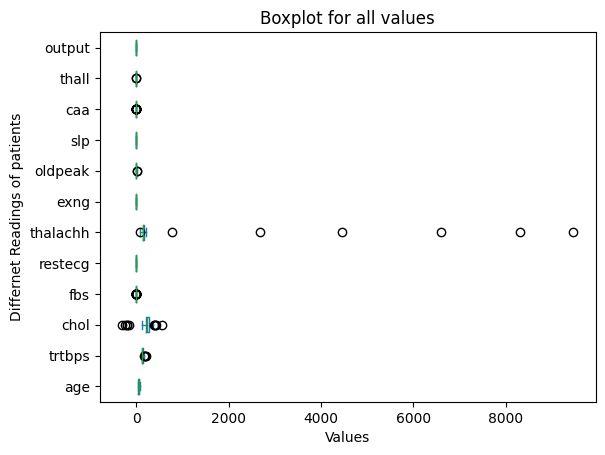

In [383]:
plt1 = newdf.plot(kind='box', vert=False, xlabel='Values', ylabel='Differnet Readings of patients', title='Boxplot for all values')

From this box plot it is evident that our data has outlier present which would affect our statistics, notably the "thalachh" and "chol" values have outliers present. "chol" also has some values less than the IQR of the attribute. 

<h1> Plotting Histogram </h1>
We will now plot a histogram of values of interest to get the idea of removal of outliers.

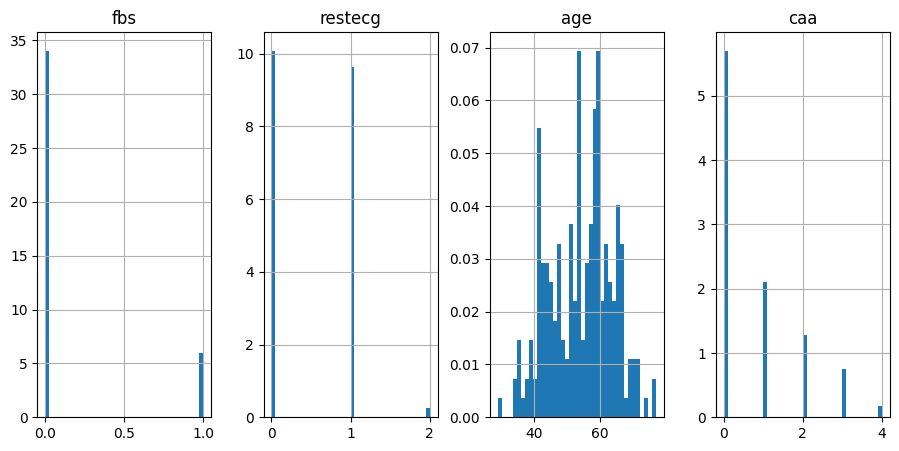

In [384]:
#Plotting the histogram for data here
fig, axs = plt.subplots(1, 4, figsize=(11,5))
df1 = newdf.hist('fbs', bins=40, ax=axs[0], density=True)
df2 = newdf.hist('restecg', bins=40, ax=axs[1], density=True)
df3 = newdf.hist('age', bins=40, ax=axs[2], density=True)
df4 = newdf.hist('caa', bins=40, ax=axs[3], density=True)

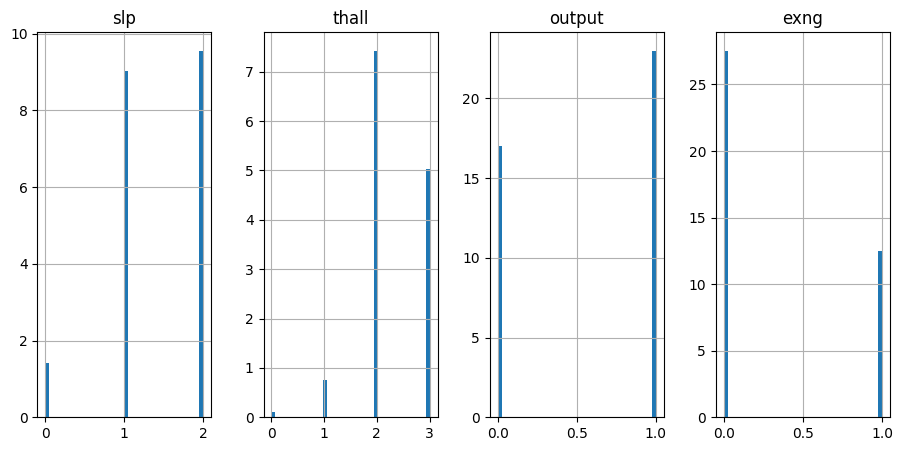

In [385]:
#Plotting the histogram for data here
fig, axs = plt.subplots(1, 4, figsize=(11,5))
df1 = newdf.hist('slp', bins=40, ax=axs[0], density=True)
df2 = newdf.hist('thall', bins=40, ax=axs[1], density=True)
df3 = newdf.hist('output', bins=40, ax=axs[2], density=True)
df4 = newdf.hist('exng', bins=40, ax=axs[3], density=True)

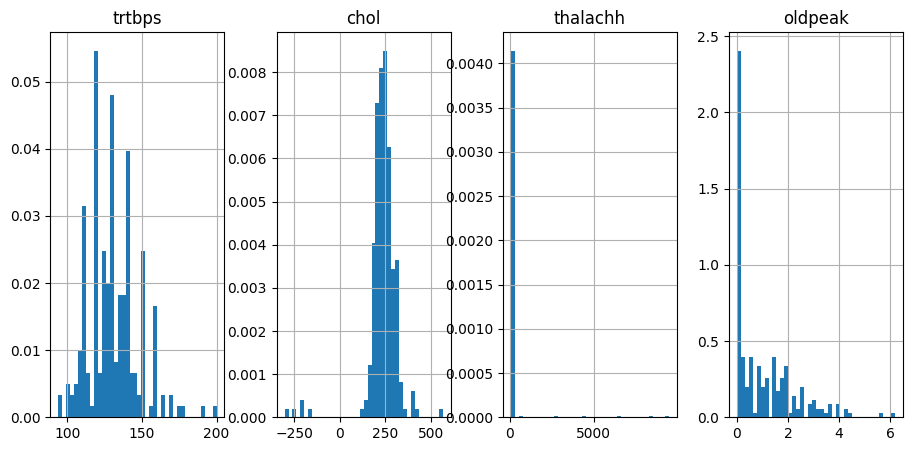

In [386]:
#Plotting the histogram for data here
fig, axs = plt.subplots(1, 4, figsize=(11,5))
df1 = newdf.hist('trtbps', bins=40, ax=axs[0], density=True)
df2 = newdf.hist('chol', bins=40, ax=axs[1], density=True)
df3 = newdf.hist('thalachh', bins=40, ax=axs[2], density=True)
df4 = newdf.hist('oldpeak', bins=40, ax=axs[3], density=True)

<h3>By looking at the plots above, we can see some of the 'caa' values have attribute 4 which is an incorrect value so we will be removing the attributes with 4 because those are incorrect values. </h3>

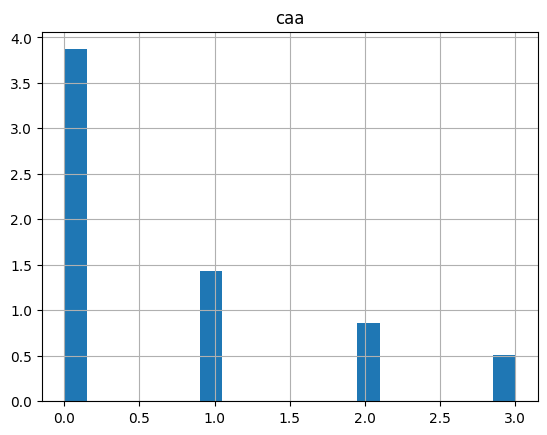

In [387]:
ndf = newdf[newdf.caa != 4]
df1 = ndf.hist('caa', bins=20, density=True)

We can see that the outliers/wrong values of 4 have been removed from our data set. 

<h3> By looking at 'chol' we realize that it has negative values, which we should not have. We will also remove the negative values from 'chol' as they are invalid because cholestrol can not be negative. </h3>

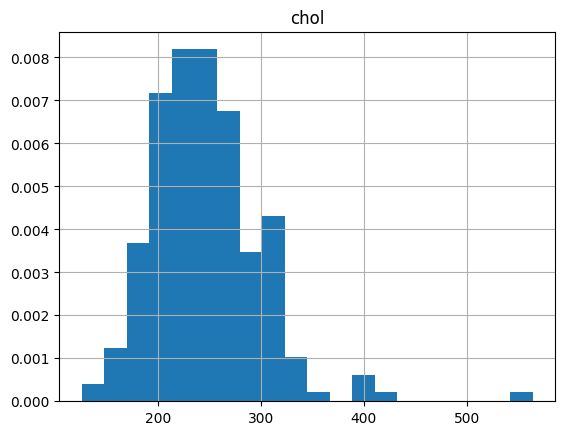

In [388]:
nndf = newdf[newdf.chol >= 0]
dfx = nndf.hist('chol', bins=20, density=True)

We can see the negative invalid values are removed from the data set. 

# Replacing the outliers

We had a look at the column values for some of the variables and figured out a way to replace them. We are going to consider the outliers as the values by the use of inter quartile range. We will replace the outlier values with the highest limit. In this way, we will get rid of the outliers from our dataframe. 

In [389]:
import numpy as np
cols= ['trtbps', 'chol', 'thalachh', 'oldpeak'] #only computing outliers for the values which are quantifiable
def replace_outliers(nndf, columns):
    for c in columns:
        q1 = nndf[c].quantile(0.25)
        q3 = nndf[c].quantile(0.75)
        iqr = q3-q1
        highLim = q3+1.5*iqr
        lowLim = q1-1.5*iqr
        print(f"High ({c}):", highLim)
        print(f"Low ({c}):", lowLim)
        nndf[c] = np.where(nndf[c] >= highLim, highLim, np.where(nndf[c] <= lowLim, lowLim, nndf[c]))
        
df_cleaned = nndf.copy()
replace_outliers(df_cleaned, cols)
df_cleaned

High (trtbps): 170.0
Low (trtbps): 90.0
High (chol): 361.0
Low (chol): 121.0
High (thalachh): 223.5
Low (thalachh): 79.5
High (oldpeak): 4.5
Low (oldpeak): -2.7


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
1,37.0,Male,non-anginal pain,130.0,250.0,0.0,1.0,187.0,0.0,3.5,0.0,0.0,2.0,1.0
3,56.0,Male,atypical angina,120.0,236.0,0.0,1.0,178.0,0.0,0.8,2.0,0.0,2.0,1.0
5,57.0,Male,typical angina,140.0,192.0,0.0,1.0,148.0,0.0,0.4,1.0,0.0,1.0,1.0
7,44.0,Male,atypical angina,120.0,263.0,0.0,1.0,173.0,0.0,0.0,2.0,0.0,3.0,1.0
9,57.0,Male,non-anginal pain,150.0,168.0,0.0,1.0,174.0,0.0,1.6,2.0,0.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,63.0,Female,typical angina,124.0,197.0,0.0,1.0,136.0,1.0,0.0,1.0,0.0,2.0,0.0
297,59.0,Male,typical angina,164.0,176.0,1.0,0.0,90.0,0.0,1.0,1.0,2.0,1.0,0.0
298,57.0,Female,typical angina,140.0,241.0,0.0,1.0,123.0,1.0,0.2,1.0,0.0,3.0,0.0
300,68.0,Male,typical angina,144.0,193.0,1.0,1.0,141.0,0.0,3.4,1.0,2.0,3.0,0.0


Now we have cleaned the data and we have a much cleaner data and our statistics should look better. We can confirm that by describing the data again. 

<h1>Plotting new improved data without Outliers </h1>
By plotting the new data on histograms we can clearly see that the distribution is much normal now and the issues have been fixed within our data. 

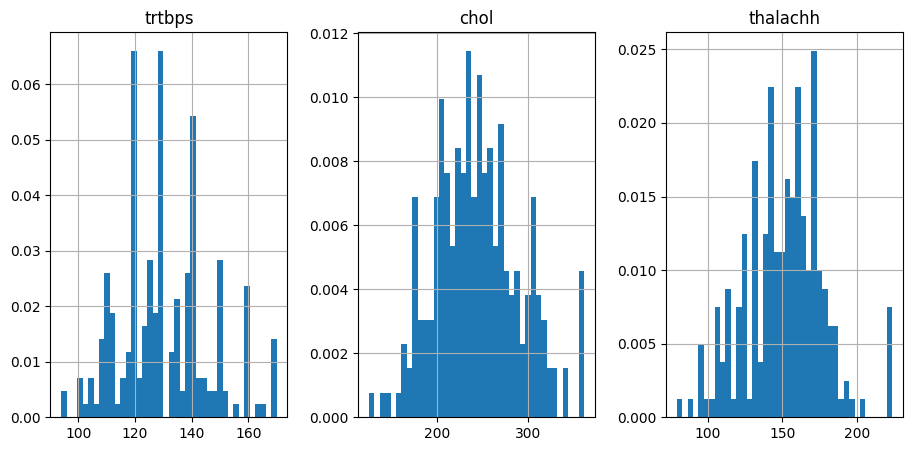

In [390]:
fig, axs = plt.subplots(1, 3, figsize=(11,5))
df1 = df_cleaned.hist('trtbps', bins=40, ax=axs[0], density=True)
df3 = df_cleaned.hist('chol', bins=40, ax=axs[1], density=True)
df4 = df_cleaned.hist('thalachh', bins=40, ax=axs[2], density=True)


In [391]:
df_cleaned.describe()

,age,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000
mean,54.201794,130.538117,244.538117,0.147982,0.511211,151.316143,0.318386,1.027354,1.399103,0.771300,2.304933,0.569507
std,9.507683,15.966664,46.488370,0.355881,0.527283,26.204365,0.466898,1.167084,0.620519,1.055522,0.619738,0.496259
min,29.000000,94.000000,126.000000,0.000000,0.000000,79.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,46.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,130.000000,242.000000,0.000000,0.000000,153.000000,0.000000,0.600000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,140.000000,271.000000,0.000000,1.000000,169.500000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,170.000000,361.000000,1.000000,2.000000,223.500000,1.000000,4.500000,2.000000,4.000000,3.000000,1.000000


Finally we will confirm that the data has been cleaned and has no missing values by checking the attribute info. 

In [392]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 223 entries, 1 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       223 non-null    float64
 1   sex       223 non-null    object 
 2   cp        223 non-null    object 
 3   trtbps    223 non-null    float64
 4   chol      223 non-null    float64
 5   fbs       223 non-null    float64
 6   restecg   223 non-null    float64
 7   thalachh  223 non-null    float64
 8   exng      223 non-null    float64
 9   oldpeak   223 non-null    float64
 10  slp       223 non-null    float64
 11  caa       223 non-null    float64
 12  thall     223 non-null    float64
 13  output    223 non-null    float64
dtypes: float64(12), object(2)
memory usage: 26.1+ KB


<h3>Finally we display the clean data.</h3>

In [393]:
df_cleaned

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
1,37.0,Male,non-anginal pain,130.0,250.0,0.0,1.0,187.0,0.0,3.5,0.0,0.0,2.0,1.0
3,56.0,Male,atypical angina,120.0,236.0,0.0,1.0,178.0,0.0,0.8,2.0,0.0,2.0,1.0
5,57.0,Male,typical angina,140.0,192.0,0.0,1.0,148.0,0.0,0.4,1.0,0.0,1.0,1.0
7,44.0,Male,atypical angina,120.0,263.0,0.0,1.0,173.0,0.0,0.0,2.0,0.0,3.0,1.0
9,57.0,Male,non-anginal pain,150.0,168.0,0.0,1.0,174.0,0.0,1.6,2.0,0.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,63.0,Female,typical angina,124.0,197.0,0.0,1.0,136.0,1.0,0.0,1.0,0.0,2.0,0.0
297,59.0,Male,typical angina,164.0,176.0,1.0,0.0,90.0,0.0,1.0,1.0,2.0,1.0,0.0
298,57.0,Female,typical angina,140.0,241.0,0.0,1.0,123.0,1.0,0.2,1.0,0.0,3.0,0.0
300,68.0,Male,typical angina,144.0,193.0,1.0,1.0,141.0,0.0,3.4,1.0,2.0,3.0,0.0


## Task 2 - Feature Engineering (20 Marks)

The models we intend to use will only receive continuous attributes. Therefore, you must encode all necessary features. Include some discussion about what you did to each column in this step, and justify your reasoning. 

### Discussion

**I will encode the 2 qualitative text based values present in the data, cp and sex.**
**First I have encoded the sex field by ordinal encoding, 0 corresponds to a Male and 1 corresponds to a female.**

In [394]:
from sklearn.preprocessing import LabelEncoder
df_le = df_cleaned.copy()
df_le = df_le.replace({'Male': 0, 'Female': 1})
df_le

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
1,37.0,0,non-anginal pain,130.0,250.0,0.0,1.0,187.0,0.0,3.5,0.0,0.0,2.0,1.0
3,56.0,0,atypical angina,120.0,236.0,0.0,1.0,178.0,0.0,0.8,2.0,0.0,2.0,1.0
5,57.0,0,typical angina,140.0,192.0,0.0,1.0,148.0,0.0,0.4,1.0,0.0,1.0,1.0
7,44.0,0,atypical angina,120.0,263.0,0.0,1.0,173.0,0.0,0.0,2.0,0.0,3.0,1.0
9,57.0,0,non-anginal pain,150.0,168.0,0.0,1.0,174.0,0.0,1.6,2.0,0.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,63.0,1,typical angina,124.0,197.0,0.0,1.0,136.0,1.0,0.0,1.0,0.0,2.0,0.0
297,59.0,0,typical angina,164.0,176.0,1.0,0.0,90.0,0.0,1.0,1.0,2.0,1.0,0.0
298,57.0,1,typical angina,140.0,241.0,0.0,1.0,123.0,1.0,0.2,1.0,0.0,3.0,0.0
300,68.0,0,typical angina,144.0,193.0,1.0,1.0,141.0,0.0,3.4,1.0,2.0,3.0,0.0


<h3> As 'cp' or chest pain is also one of the textual attributes in our dataframe, we will also perform encoding on that. </h3>

By doing so, we will get all the fields of 'cp'. Now that we know them, we will encode all of them accordingly. We will encode 
**asymptomatic: 0**, 
**non-anginal pain: 1**, 
**atypical angina: 2**, 
 and **typical angina: 3.** 


In [395]:
df_le = df_le.replace({'asymptomatic': 0, 'non-anginal pain': 1, 'atypical angina': 2, 'typical angina': 3})
df_le

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
1,37.0,0,1,130.0,250.0,0.0,1.0,187.0,0.0,3.5,0.0,0.0,2.0,1.0
3,56.0,0,2,120.0,236.0,0.0,1.0,178.0,0.0,0.8,2.0,0.0,2.0,1.0
5,57.0,0,3,140.0,192.0,0.0,1.0,148.0,0.0,0.4,1.0,0.0,1.0,1.0
7,44.0,0,2,120.0,263.0,0.0,1.0,173.0,0.0,0.0,2.0,0.0,3.0,1.0
9,57.0,0,1,150.0,168.0,0.0,1.0,174.0,0.0,1.6,2.0,0.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,63.0,1,3,124.0,197.0,0.0,1.0,136.0,1.0,0.0,1.0,0.0,2.0,0.0
297,59.0,0,3,164.0,176.0,1.0,0.0,90.0,0.0,1.0,1.0,2.0,1.0,0.0
298,57.0,1,3,140.0,241.0,0.0,1.0,123.0,1.0,0.2,1.0,0.0,3.0,0.0
300,68.0,0,3,144.0,193.0,1.0,1.0,141.0,0.0,3.4,1.0,2.0,3.0,0.0


<h3> Shows the final data after both fields being encoded. </h3>

## Task 3 - Scale the Data (20 Marks)

**Undergraduate Students:** Choose at least 2 Data Scaling Techniques, apply that scaling technique to the appropriate columns in your dataframe. You must justify and discuss the techniques chosen. 

Take a look at sklearn.preprocessing https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing

**Graduate Students:** Select at least 3 Data Scaling Techniques, apply all of them. You must justify and discuss the techniques chosen. 

Make sure you present and discuss the effects of those techniques in the data. 

### Discussion

**The first scalling technique that I used is Quantile, by doing so it converts the existing data into unified units which are easier to interpret and the transformed values are equivlant of their old values. This is also the technique which produces highest accuracy. The quantile function ranks or smooths out the relationship between observations and can be mapped onto other distributions, such as the uniform or normal distribution.**

<br>

**The second scaling technique that I used is Z Score Scalar. It is evident that this scaling technique not only preserves the integrity of the values but it also fixes the skewness of the graphs. For example, all of the values especially 'thalachh' has a more normal distribution now and the graphs are more smooth. The denisty is also improved and more area comes under the line than before. Z score will ensure your feature distributions have mean = 0 and std = 1**

<h3> Scaling Technique #1 Quantile </h3>

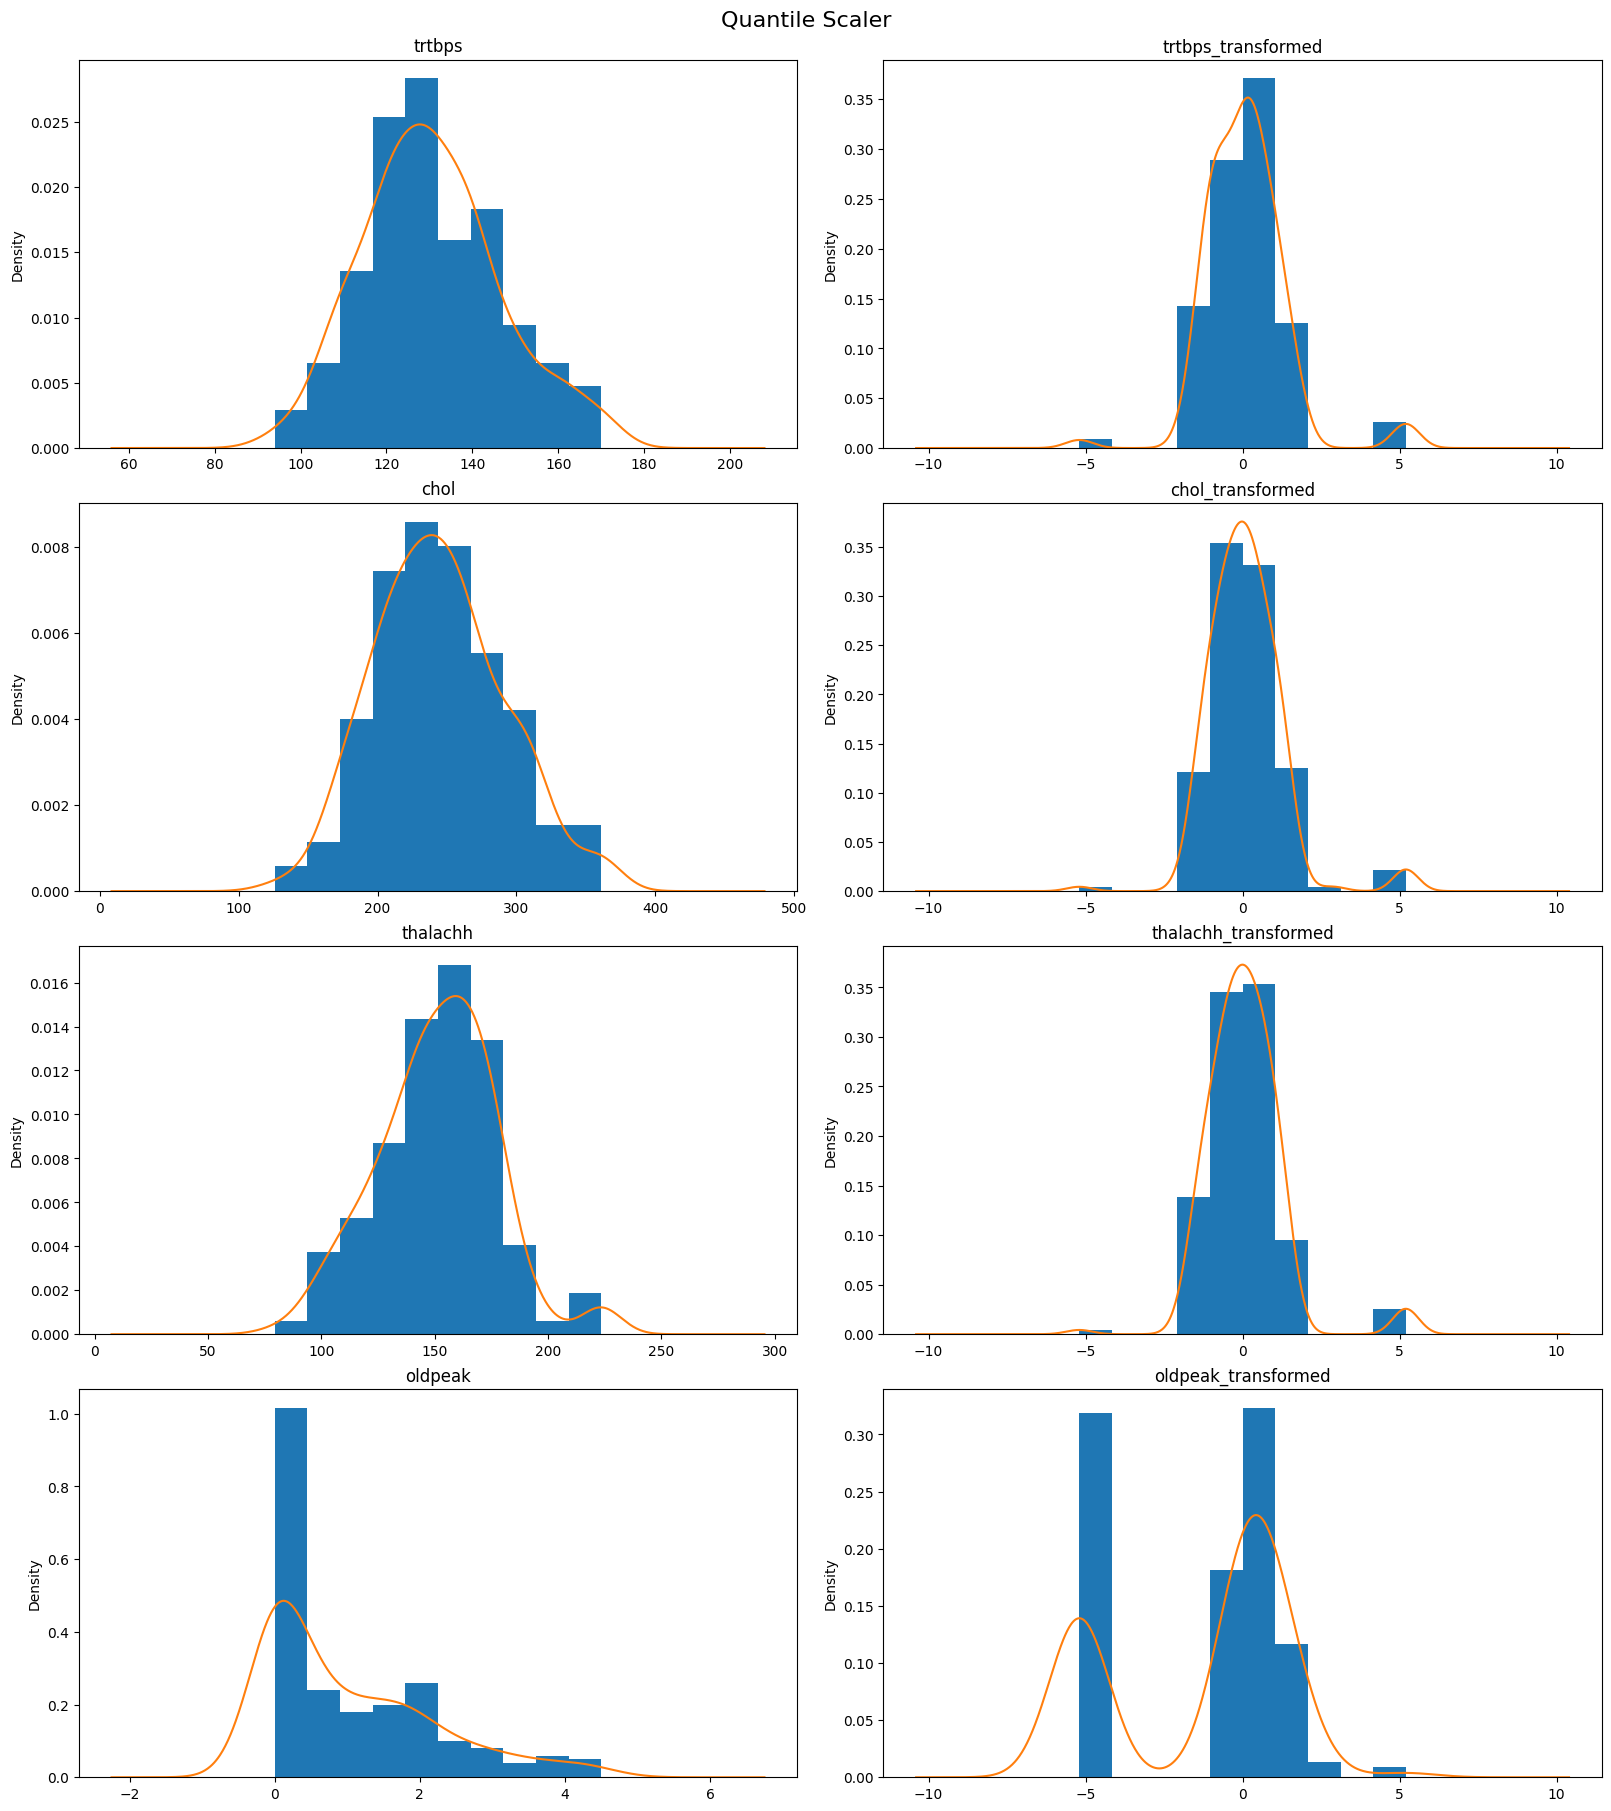

In [407]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
df_task3 = df_le.copy()

val_cols_names = ['trtbps', 'chol', 'thalachh', 'oldpeak'] #only computing outliers for the values which are quantifiable
def plot_histograms_density(df, columns, df_transformed, fig_title):
    fig, axs = plt.subplots(len(columns),2,figsize=(16,18),constrained_layout=True)
    fig.suptitle(fig_title, fontsize=16)
    axs = axs.flatten()
    i = 0 
    for c in columns:
        df_task3[c].hist(ax=axs[i], density=True) # normalizes the density
        df_task3[c].plot.density(ax=axs[i], title=c)
        df_transformed[c].hist(ax=axs[i+1], density=True, stacked=True) # normalizes the density
        df_transformed[c].plot.density(ax=axs[i+1], title=str(c+'_transformed'))
        i+=2

from sklearn.preprocessing import QuantileTransformer

# scaler = QuantileTransformer(n_quantiles=10, random_state=0)
scaler = QuantileTransformer(n_quantiles=10, random_state=0, output_distribution='normal')
qtl_tdf = scaler.fit_transform(df_task3)
qtl_tdf = pd.DataFrame(qtl_tdf, index=df_task3.index, columns=df_task3.columns)

plot_histograms_density(df_task3, val_cols_names, qtl_tdf, 'Quantile Scaler')


<h3> Scaling Technique #2 ZScore </h3>

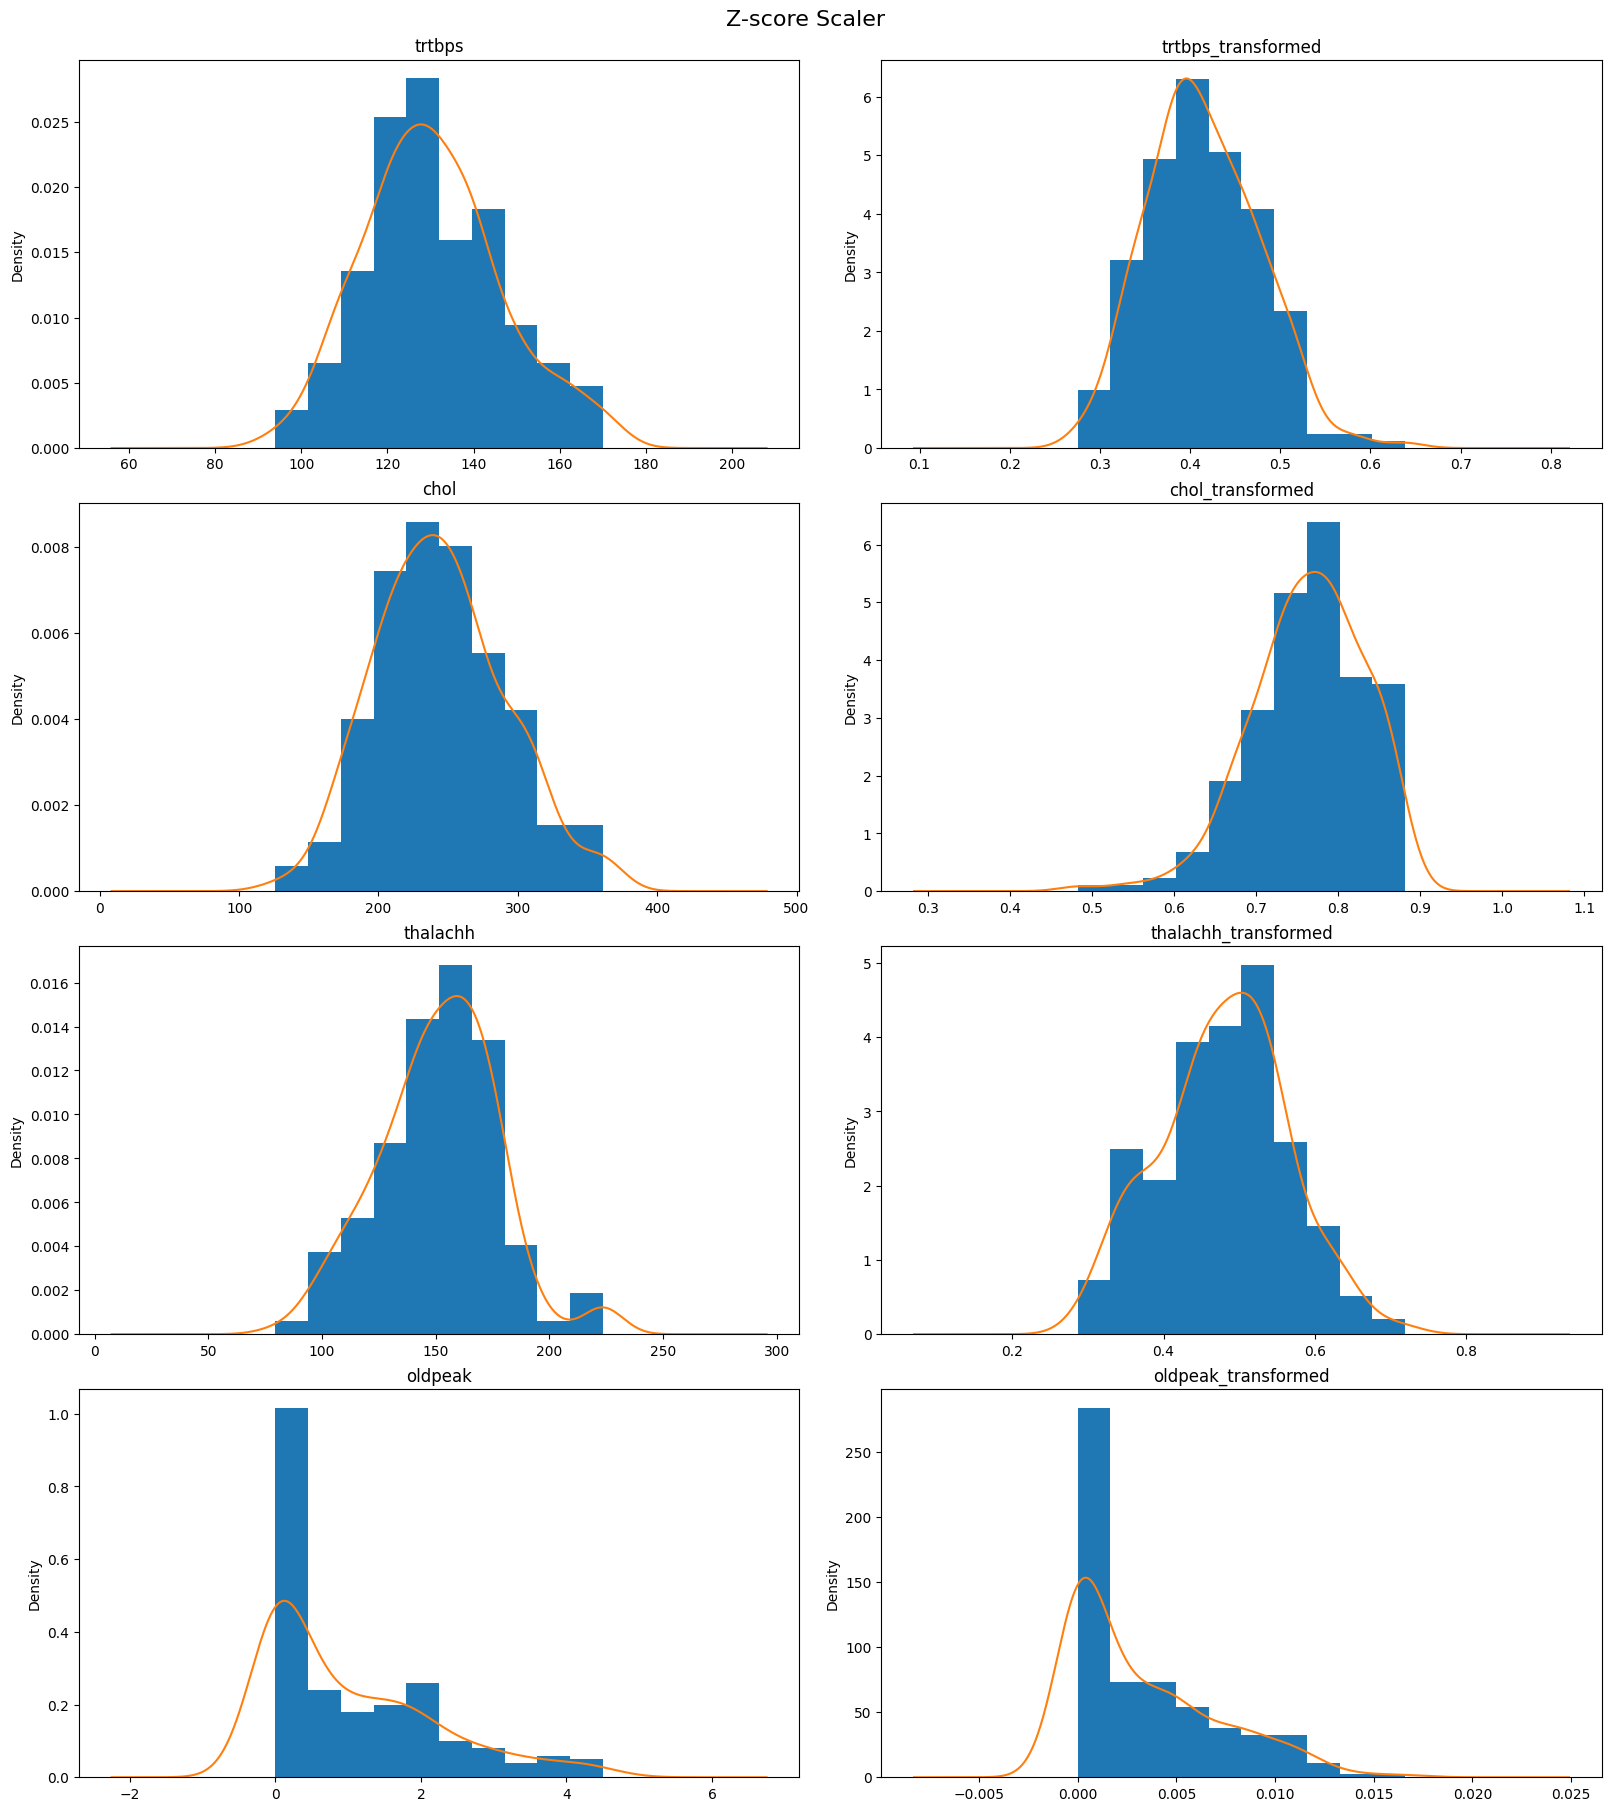

In [397]:
from sklearn.preprocessing import Normalizer

zscore_tdf = df_task3.copy()
scaler = Normalizer()
zscore_tdf[['trtbps', 'chol', 'thalachh', 'oldpeak']] = scaler.fit_transform(df_task3[['trtbps', 'chol', 'thalachh', 'oldpeak']])
zscore_tdf = pd.DataFrame(zscore_tdf, index=df_task3.index, columns=df_task3.columns)
plot_histograms_density(df_task3, val_cols_names, zscore_tdf, 'Z-score Scaler')

## Task 4 - Model Training and Testing (20 Marks)

You must split your dataset for a training/ testing setup. In the training step you must generate 30 estimates per classifier for having some confidence in your choices. 

**Undergraduate Students:** Choose at least 2 supervised learning models from scikit learn which the effects of scaling would cause an impact.

**Graduate Students:** Select at least 3 supervised learning models from scikit learn where the effects of scaling would cause an impact.

Here you must combine the models with the scaling techniques selected by you in the Task 2. It is also up to you finding a way to generate 30 estimates using a strategy that will guarantee that training/test splits are changed for each estimate created. The outcome from this task must be 30 estimates for each (*classifier + scaling*) technique stored in a structure that you will use to create plots for each of those combinations. You must also decide on a performance metric suitable for this dataset. Please add in the discussion the reason for all your decisions.

### Discussion


**The suitable performance metric for this task would be using the 'caa' field as it is the attribute with the missing values. We should be using 'caa' in order to see which Model and Scaling technique would produce the best results that we can possibly used to fill and replace empty rows in'caa'. I used KNN and SGDClassifier as I believe it would fit my data set the most. For SGDC large negative values signify higher importance in the prediction of negative class. This can be seen from the expression of logistic loss. KNN was also one of my choices because, The KNN algorithm can compete with the most accurate models because it makes highly accurate predictions. Therefore, you can use the KNN algorithm for applications that require high accuracy but that do not require a human-readable model.**

<h3> Supervised Learning Model #1 KNN </h3>

In [398]:
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import QuantileTransformer

scaler_names = ['Z-score', 'Quantile']
arr_scalers = [ Normalizer(), QuantileTransformer(n_quantiles=10, random_state=0, output_distribution='normal')]
results = {}

model = KNeighborsClassifier(n_neighbors=3)

for i in range (len(arr_scalers)):
    X = df_le.drop(['caa'], axis=1).to_numpy()    
    X_t = arr_scalers[i].fit_transform(X)
    y = df_le['caa'].to_numpy()
    cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X_t, y, scoring='f1_weighted', cv=cv, n_jobs=-1)
    results[scaler_names[i]] = scores
X = df_le.drop(['caa'], axis=1).to_numpy()
y = df_le['caa'].to_numpy()
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(model, X, y, scoring='f1_weighted', cv=cv, n_jobs=-1)
results['Raw data'] = scores
df_res = pd.DataFrame(results)
df_res


,Z-score,Quantile,Raw data
0,0.530774,0.439465,0.519915
1,0.637681,0.581659,0.625384
2,0.556522,0.742175,0.606211
3,0.477273,0.466667,0.437500
4,0.294132,0.367424,0.396104
5,0.572992,0.361322,0.378788
6,0.463636,0.407925,0.477922
7,0.424242,0.553275,0.451613
8,0.590909,0.581169,0.568263
9,0.209957,0.311832,0.267288


<h3> Supervised Learning Model #2 SGDClassifier </h3>

In [399]:
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

scaler_names = [ 'Z-score', 'Quantile']
arr_scalers = [ Normalizer(), QuantileTransformer(n_quantiles=10, random_state=0, output_distribution='normal')]
results1 = {}

model = SGDClassifier(loss="squared_error", penalty="l2", max_iter=1000)

for i in range (len(arr_scalers)):
    X = df_le.drop(['caa'], axis=1).to_numpy()  
    X_t = arr_scalers[i].fit_transform(X)
    y = df_le['caa'].to_numpy()
    cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X_t, y, scoring='f1_weighted', cv=cv, n_jobs=-1)
    results1[scaler_names[i]] = scores
X = df_le.drop(['caa'], axis=1).to_numpy()
y = df_le['caa'].to_numpy()
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(model, X, y, scoring='f1_weighted', cv=cv, n_jobs=-1)
results1['Raw data'] = scores

df_res1 = pd.DataFrame(results1)
df_res1


,Z-score,Quantile,Raw data
0,0.048309,0.156522,0.357764
1,0.150988,0.129766,0.030100
2,0.466860,0.278261,0.003623
3,0.058442,0.000000,0.472727
4,0.263636,0.273227,0.237537
5,0.103030,0.214286,0.286844
6,0.329545,0.316667,0.385027
7,0.324421,0.287879,0.003953
8,0.090909,0.154270,0.055944
9,0.152585,0.169881,0.116883


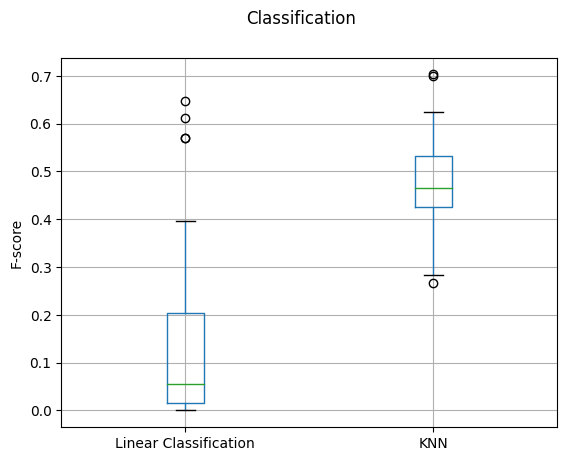

In [400]:
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

# here we create a linear classification model
lin_model = SGDClassifier(loss="squared_error", penalty="l2", max_iter=500)
X = df_le.drop(['caa'], axis=1).to_numpy()
y = df_le['caa'].to_numpy()

# Let's estimate the values for several rounds of cross-validation. Let's use F-score as our desired metric
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
lin_scores = cross_val_score(lin_model, X, y, scoring='f1_weighted', cv=cv, n_jobs=-1)

# Let's follow the same strategy for KNN
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_scores = cross_val_score(knn_model, X, y, scoring='f1_weighted', cv=cv, n_jobs=-1)

# Let's merge all results to create a boxplot
df_outcomes = pd.DataFrame(lin_scores)
df_outcomes['KNN'] = knn_scores
df_outcomes.columns = ['Linear Classification', 'KNN']
# Finally let's plot 
boxplot = df_outcomes.boxplot() 
boxplot.set_ylabel('F-score')
plt.suptitle('Classification')
plt.show()

<h3> We can clearly see from the data plot above that for our purpose KNN technique would be our best bet. Linear Model also has a very very high variance which is why KNN would provide a better model. </h3>

## Task 5 - Plot Training Accuracy (10 Marks)

Generate a box plot with the accuracy for each *data scaling technique + model* selection and discuss your results. You must indicate the best combination model + scaling technique, but you also need to discuss all results (i.e., from Model **X**, the best choice is scaling technique **A** because and the best overall model(s)). 


### Discussion

<h3> Best Overall Model is KNN + Quantile </h3>
The best scaling technique would be K Neighbour Classifier+Quantile as it produces the best accuracy. Using it improves the data f-score by 6-8%.

For Model Number 2, SGDC, the best technique would be Quantile + SGDC as it improves the data f-score the most by almost 10%.

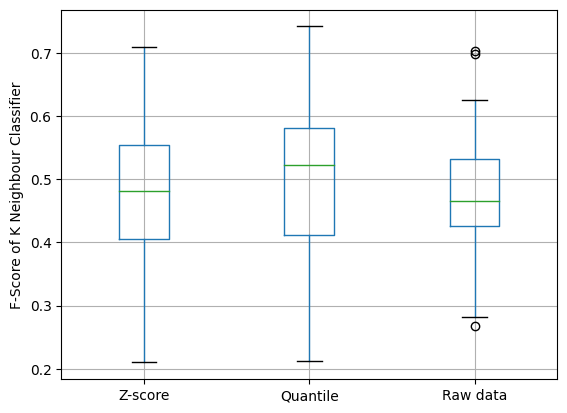

In [401]:
# Now let's create our boxplot
df_res = pd.DataFrame(results)
boxplot = df_res.boxplot() 
boxplot.set_ylabel('F-Score of K Neighbour Classifier')
plt.show()

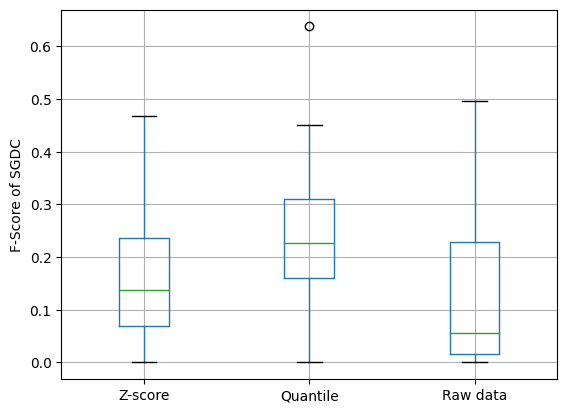

In [402]:
df_res1 = pd.DataFrame(results1)
boxplot = df_res1.boxplot() 
boxplot.set_ylabel('F-Score of SGDC')
plt.show()

## Task 6 - Output Test Prediction (10 Marks)

At this stage, take your selected model, and train it on all the training data (**dataset-A.csv**), including the validation set.

For the file called **dataset-B.csv**, generate the predictions using your trained model. Use .predict() and save it in a variable called test_output. Please report your final result in terms of your performance metric. 

**Note: Naming the variable something other than test_output will result in a mark deduction**.

In [403]:
df1 = df_le.copy()
df2 = pd.read_csv('dataset-B.csv', index_col=(0))

# KNN
# The best for KNN was the MinMax scaler
X = df1.drop(['caa'], axis=1).to_numpy()
quantile = QuantileTransformer(n_quantiles=10, random_state=0, output_distribution='normal')
X_t = quantile.fit_transform(X)
y = df1['caa'].to_numpy()
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_t, y)
df2 = df2.replace({'asymptomatic': 0, 'non-anginal pain': 1, 'atypical angina': 2, 'typical angina': 3})
df2 = df2.replace({'Male': 0, 'Female': 1})

# Now let's use the model to predict the missing rows
x_toPredict = df2.to_numpy()
# we need to transform the data in X_to_pred (do not fit, otherwise the scaler will change the ranges)
X_t_to_pred = quantile.transform(x_toPredict)
y_pred = model.predict(X_t_to_pred)
test_output = y_pred

test_output

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0.])

## Task 7 - Best Test Accuracy (10 Marks) (Graduate Students Only) (10 marks extra for Undergraduate students)

This task is to encourage you to further explore more models (and hyperparameter combinations), data preparation techniques (data scaling and feature engineering), and more to improve your model and increase your chances of finding the best model possible. You are free to use any of the techniques discussed in class but you can also invest your time into finding other strategies not seen in class. If you choose something not seen in class, please add some reference to the marker. At this stage, **feature selection and dimensionality reduction will not be allowed**. You will be graded in this item not only by your final performance, but by the ingenuity of strategies you use at this item.

Students with the top 25% of test accuracy will receive 10/10 marks. 

Students in the top 50% of test accuracy will receive 7.5/10 marks.

Students in the top 75% of test accuracy will receive 5/10 marks.

Students below the top 75% of test accuracy will receive 2.5/10 marks.

Students who fail to submit a test accuracy will receive 0/10 marks.




In [404]:
''' 
    Enter your code here
    You are allowed to use more than one cell if this helps explaining
    your pipeline and insights.
    Make sure you help the marker following both your code and reasoning
'''

' \n    Enter your code here\n    You are allowed to use more than one cell if this helps explaining\n    your pipeline and insights.\n    Make sure you help the marker following both your code and reasoning\n'